# Worksheet 9 
In this sheet we will work on latent variable methods for density estimation and dimensionality reduction.

If you have been finding the datasets in the labs or the group project a bit of a challenge, then this picture may look familiar.

![Figure: worksheet datasets versus datasets in the wild](./datasetsWild.jpg)

在这个工作表中，我们将研究密度估计和降维的潜变量方法。

如果你发现实验室或小组项目中的数据集有些难度，那么这张图片可能会让你感到熟悉。

## Singular values (level 2 only)
We first test out our understanding of singular values and condition numbers of matrices. Read the following segment of code.

我们首先测试一下我们对矩阵的奇异值和条件数的理解。阅读下面的代码片段。

In [45]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline


E =np.array( [[0.0315,   0.0188,   0.0117,  -0.0919], \
   [-0.0166,   -0.0211,  -0.0106,   0.0550], \
   [-0.2431,   -0.0874,   -0.0666,    0.6705], \
   [-0.2346,   -0.0680,   -0.0574,    0.6348]])

Complete the next block so as to compute the singular values of the matrix $E$ and write down the condition number of the matrix. Then add $10^{-4}$ to the diagonal elements of $E$. Write down the new condition number.

完成下一个代码块，以计算矩阵$E$的奇异值，并写下矩阵的条件数。然后将$E$的对角线元素加上$10^{-4}$。写下新的条件数。

In [10]:
#TODO block 1
# Compute the singular values of E
sing_vals = la.svd(E, compute_uv=False)
# Write down the condition number of E
cond_num = la.cond(E)
# Add 10^-4 to the diagonal elements of E
E = E + 10**-4*np.eye(4)

print('The singular values of E are: ' + str(sing_vals))
print('The condition number of E is: ' + str(cond_num))
print('The new condition number of E is: ' + str(la.cond(E)))

The singular values of E are: [9.99995458e-01 2.15481775e-02 4.69100512e-04 1.06309767e-05]
The condition number of E is: 94064.30707161677
The new condition number of E is: 28352.350771182202


## Mixture models: 1d example. (For all)
In this section we will look at the basics of fitting a Gaussian mixture model to some one-dimensional data. In the first block of code we create a one-dimensional data of length 10 as a column vector. Read the code carefully so that you understand how the data was created.

在这一部分中，我们将研究如何将高斯混合模型拟合到一维数据。在第一个代码块中，我们创建了一个长度为10的一维数据作为列向量。仔细阅读代码，以便理解数据是如何创建的。

In [13]:
from sklearn import mixture
from numpy.random import Generator, PCG64
mean = 2 # 设定均值 
sigma = np.sqrt(5) # 设定标准差
rng = Generator(PCG64(12345)) # 设定随机数种子，使用PCG64算法和Generator类随机数生成器
vals = mean + sigma*rng.standard_normal(10) # 生成10个服从正态分布的随机数
vals[9] = 10 # 修改第10个数值为10

vals[:, np.newaxis] # 将vals转换为列向量
vals = vals.reshape(-1, 1) # 将vals转换为列向量
vals

array([[-1.18376957],
       [ 4.82578274],
       [ 0.05314117],
       [ 1.42047103],
       [ 1.83152724],
       [ 0.34333155],
       [-1.05847746],
       [ 3.45096842],
       [ 2.80735048],
       [10.        ]])

In [16]:
import numpy as np

# 使用numpy库生成服从正态分布的随机数:更直接的方法
# 指定均值、标准差和随机数数量
mean = 2
std = np.sqrt(5)
size = 10

# 生成随机数
random_numbers = np.random.normal(mean, std, size)
random_numbers

array([-0.25265998,  3.10589275,  0.93870193,  3.84731921,  0.56247829,
       -0.53405305,  0.86796332,  1.86010893,  2.90849459,  4.51676646])

In the following block of code we fit a GMM with 5 components and default parameters (setting the initial random state to ensure that the code is reproducible). The function `score_samples` computes a vector containing the log likelihood of every point in `Z`. More detail can be found in the __[API](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)__

在下面的代码块中，我们使用5个组件和默认参数（设置初始随机状态以确保代码可重现）拟合了一个GMM。函数`score_samples`计算了`Z`中每个点的对数似然的向量。更多细节可以在__[API](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)__中找到。

In [14]:
clf = mixture.GaussianMixture(n_components=5, covariance_type='spherical', random_state =1729)
clf.fit(vals)

Z = clf.score_samples(vals)
print('Log likelihood=' + str(Z))

Log likelihood=[-0.25812186 -2.8669242  -1.09798939 -1.44433765 -1.44217811 -1.09794687
 -0.25812184 -2.0049397  -2.39991244  3.68623152]


E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In the next block of code, create and fit a GMM with parameters as above but also set the maximum number of iterations to 1000
(to ensure that the EM algorithm runs for a long time), the initial centres to [[0], [0.01], [-0.01], [0.0001], [8]], `reg_covar` 
to 0, and `tol` to `1e-30`. Run the code and write down what happens. Try to explain it. 

You may find it helpful to consult the __[API for the GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)__

在下一个代码块中，创建并拟合一个具有上述参数的GMM，但还将最大迭代次数设置为1000（以确保EM算法运行很长时间），将初始中心设置为[[0], [0.01], [-0.01], [0.0001], [8]]，`reg_covar`设置为0，`tol`设置为`1e-30`。运行代码并写下发生了什么。尝试解释一下。

您可能会发现查阅__[GaussianMixture的API](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)__有所帮助。

ans：
这个错误信息指出高斯混合模型（GMM）在拟合过程中遇到了一些问题，具体来说是因为一些组件的经验协方差定义不良。这通常是由于以下几种情况之一造成的：

1. **单例或塌陷样本**：如果数据中有组件只由一个或极少数样本组成，这可能导致计算协方差时出现问题。单例样本会导致协方差矩阵计算不稳定或者不可逆。

2. **组件数量设置过多**：如果设置的组件数（`n_components`）超过了数据本身所能支持的合理数量，也可能导致一些组件找不到足够的数据点来合理估计其参数，从而引起定义不良的经验协方差。

3. **过小的`reg_covar`值**：`reg_covar`参数用于正则化协方差矩阵，避免在估计过程中出现数值问题。如果这个值设置得太小，可能不足以提供必要的正则化，从而导致数值不稳定。

4. **过于严格的收敛标准**：你设置的`tol=1e-30`非常严格。这可能导致算法难以在这么精细的标准下稳定收敛，尤其是当数据或模型的某些方面本身就存在一些微小的数值不稳定性时。

### 解决方案：

- **减少组件数量**：尝试减少`n_components`的值。如果数据不支持那么多的组件，减少组件数量可以避免定义不良的经验协方差。

- **增加`reg_covar`**：增加`reg_covar`的值可以帮助稳定协方差矩阵的计算，防止因为数据问题导致的计算不稳定。可以尝试逐步增加这个值，直到模型能够稳定拟合为止。

- **放宽收敛标准**：增加`tol`的值可以减少模型在极其精细的数值变化上追求收敛，从而提高算法的稳定性和收敛速度。

- **检查数据**：确保输入的数据`vals`没有问题（如极端值、异常值等），并且与你尝试拟合的模型设定（如组件数量）相匹配。

在调整这些参数后，重新运行模型，观察是否能够成功拟合。通常，需要通过一些试错来找到适合特定数据集的最佳参数设置。

In [17]:
#TODO block 2
clf = mixture.GaussianMixture(n_components=5, covariance_type='spherical', random_state =1729, max_iter=1000, means_init = np.array([[0], [0.01], [-0.01], [0.0001], [8]]), reg_covar=0, tol=1e-30)
clf.fit(vals)

Z = clf.score_samples(vals)
print('Log likelihood=' + str(Z))



E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

## Mixture models: experiments with complexity
In this section we will investigate how to determine an appropriate complexity for a Gaussian mixture model. First we read in three prepared datasets. You should complete TODO block 3 with code that reads in `valid_data` to a variable `Xvalid` and `test_data` to a variable `Xtest`. These datasets will be used for training, validation and testing respectively. Each has 200 rows and 4 columns.

在这一部分中，我们将研究如何确定高斯混合模型的适当复杂度。首先，我们读取三个准备好的数据集。您应该完成TODO块3，使用代码将`valid_data`读入变量`Xvalid`，将`test_data`读入变量`Xtest`。这些数据集将分别用于训练、验证和测试。每个数据集都有200行和4列。

In [24]:
import pandas as pd

X = pd.read_csv('./dataset/training_data.csv')
Xtrain = X.to_numpy()
Xtrain = Xtrain[0:201, 1:5]

#TODO block 3

X = pd.read_csv('./dataset/valid_data.csv')
Xvalid = X.to_numpy()
Xvalid = Xvalid[0:201, 1:5]

X = pd.read_csv('./dataset/test_data.csv')
Xtest = X.to_numpy()
Xtest = Xtest[0:201, 1:5]

In the next section, you should write code to fit a Gaussian mixture model with each of 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50 centres. For each model, compute the total negative log likelihood of the training set and the validation set, and then create a graph with both of these sets of values shown as line graphs. Use `random_start` set to 1729 and spherical covariances: all other parameters should be left with their default values.

You may get an error message connected with a memory leak in KMeans; do not worry about this. 

在下一节中，你应该编写代码，使用1、2、3、4、5、6、7、8、9、10、20、30、40、50个中心分别拟合一个高斯混合模型。对于每个模型，计算训练集和验证集的总负对数似然，并创建一个图，将这两组值显示为线图。使用`random_start`设置为1729和球形协方差：所有其他参数应保持默认值。

你可能会收到一个关于KMeans内存泄漏的错误消息；不用担心。

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

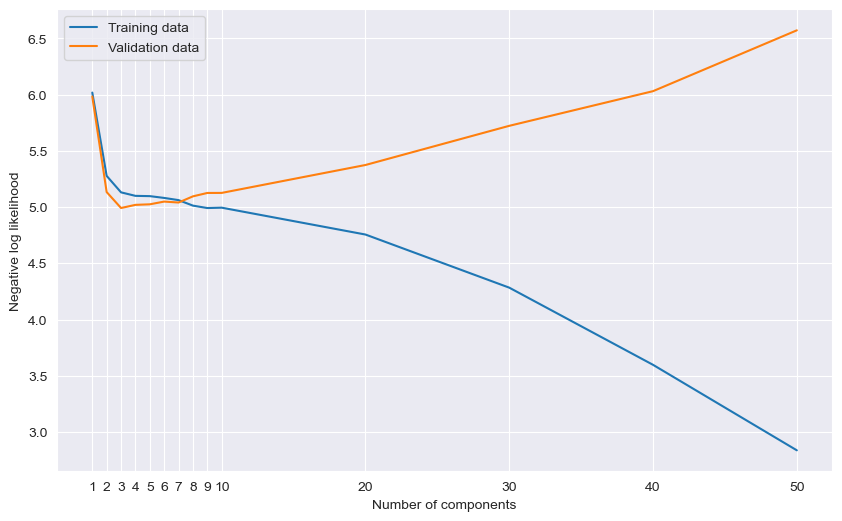

In [29]:

trainNLL = []
validNLL = []

#TODO block 3
centers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
for k in centers:
    clf = mixture.GaussianMixture(n_components=k, covariance_type='spherical', random_state =1729)
    clf.fit(Xtrain)
    trainNLL.append(-clf.score(Xtrain))
    validNLL.append(-clf.score(Xvalid))
    
# Plot the graph,横坐标设置间隔为1
# 设置图形大小，透明背景
plt.figure(figsize=(10, 6), facecolor='w')
plt.plot(centers, trainNLL, label='Training data')
plt.plot(centers, validNLL, label='Validation data')
plt.xlabel('Number of components')
plt.ylabel('Negative log likelihood')
plt.xticks(centers)
plt.legend()
plt.show()



Compare the two graphs for the training data and validation respectively. In your judgement, what is the optimal number of components in the GMM?

Next, recreate the GMM with the optimal number of components and then use it to score the test data `Xtest`. Plot a histogram of the log likelihoods of the test data (using 20 bins). Write down what you notice about the histogram.

比较训练数据和验证数据的两个图。在你的判断中，GMM中的最佳组件数量是多少？
ans: 从图中可以看出，随着组件数量的增加，训练数据的负对数似然值逐渐减小，而验证数据的负对数似然值则在组件数量为5时达到最小值，之后逐渐增大。因此，我认为GMM中的最佳组件数量是3

接下来，使用最佳组件数量重新创建GMM，然后使用它对测试数据`Xtest`进行评分。绘制测试数据的对数似然直方图（使用20个bin）。写下你对直方图的观察。

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


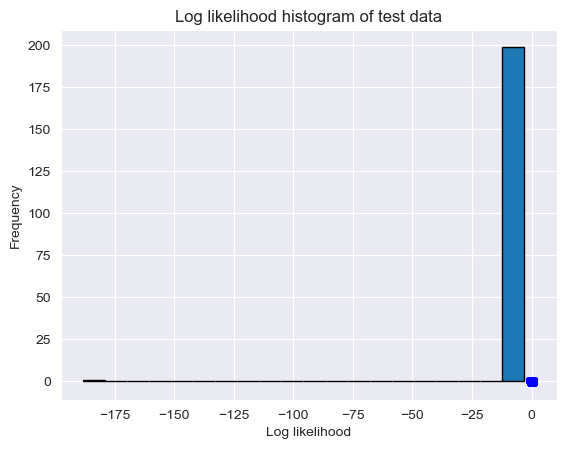

In [47]:
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np

# 假设Xtest已经被定义和加载

# 使用最佳组件数量创建GMM
best_n_components = 3
clf_best = mixture.GaussianMixture(n_components=best_n_components, covariance_type='spherical', random_state=1729)
clf_best.fit(Xtrain)  # 注意：我们使用训练数据来拟合模型

# 使用拟合好的模型对测试数据进行评分
log_likelihood = clf_best.score_samples(Xtest)

# 绘制对数似然直方图
plt.hist(log_likelihood, bins=20, edgecolor='k')
plt.xlabel('Log likelihood')
plt.ylabel('Frequency')
plt.title('Log likelihood histogram of test data')
plt.show()

Finally, find the point with the minimum log likelihood under this GMM. Write down its index in the dataset and the coordinates of the point.

最后，找到在这个GMM下具有最小对数似然的点。写下它在数据集中的索引和点的坐标。

In [39]:
#TODO block 5
# 对测试数据进行评分，获取对数似然值
log_likelihood = clf_best.score_samples(Xtest)

# 找到最小对数似然值的点
min_log_likelihood_index = np.argmin(log_likelihood)
min_log_likelihood_value = log_likelihood[min_log_likelihood_index]
min_log_likelihood_point = Xtest[min_log_likelihood_index]

min_log_likelihood_index, min_log_likelihood_point, min_log_likelihood_value

(199, array([8., 8., 8., 8.]), -188.2082983002012)

## GTM experiments
There are two Python packages which implement GTM. `ugtm` is the better of the two, but is only moderate in quality (it doesn't include an implementation of magnification factors and the documentation is rather patchy). You should install the package using `pip install`.

If you have access and skills in Matlab, I would recommend using the Netlab implementation, which does include more functionality.

We start by showing how to initialise and fit a GTM to the same dataset we have been using.

The parameters are defined as follows:
    
* k : int, optional (default = 16)
        If k is set to 0, k is computed as sqrt(5*sqrt(n_individuals))+2.
        k is the sqrt of the number of GTM nodes.
        One of four GTM hyperparameters (k, m, s, regul).
        Ex: k = 25 means the GTM will be discretized into a 25x25 grid.
* m : int, optional (default = 4)
        If m is set to 0, m is computed as sqrt(k).
        m is the qrt of the number of RBF centers.
        One of four GTM hyperparameters (k, m, s, regul).
        Ex: m = 5 means the RBF functions will be arranged on a 5x5 grid.
* s : float, optional (default = 0.3)
        RBF width factor.
        One of four GTM hyperparameters (k, m, s, regul).
        Parameter to tune width of RBF functions.
        Impacts manifold flexibility.
* regul : float, optional (default = 0.1)
        One of four GTM hyperparameters (k, m, s, regul).
        Regularization coefficient.
* random_state : int (default = 1234)
        Random state.
* niter : int, optional (default = 200)
        Number of iterations for EM algorithm.
* verbose : bool, optional (default = False)
        Verbose mode (outputs loglikelihood values during EM algorithm).
* prior : {'estimated', 'equiprobable'}
        Type of prior for class map. Use 'estimated' to account for
        class imbalance.

Text(0.5, 1.0, 'k=10, m=5')

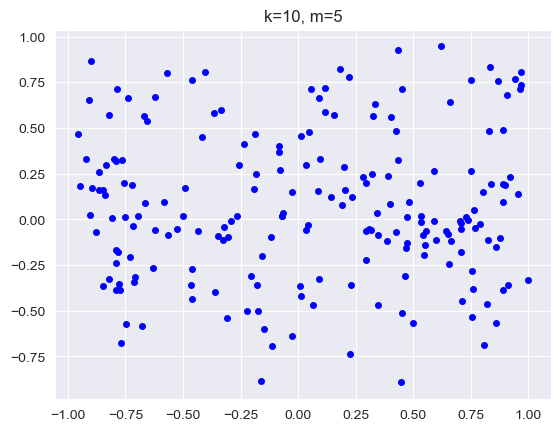

In [49]:
import ugtm

gtm = ugtm.eGTM( k=10, m=5, s=1, regul=0.5, random_state = 1729 )

gtm.fit(Xtrain)

points = gtm.transform(Xtest)


plt.figure(2)
scatterPlot = plt.plot(points[0:200, 0], points[0:200,1], 'b.', markersize=8)
plt.title('k=10, m=5')
# plt.show()

Can you spot any outliers in this plot? 


Next, write some code to create plots for GTMs with fixed k=10 and let m = 3, 5, 7, 9, 11. Write down what you notice about these plots.

下一步，编写一些代码，为固定的k=10的GTM创建图形，让m=3, 5, 7, 9, 11。写下你对这些图形的观察。

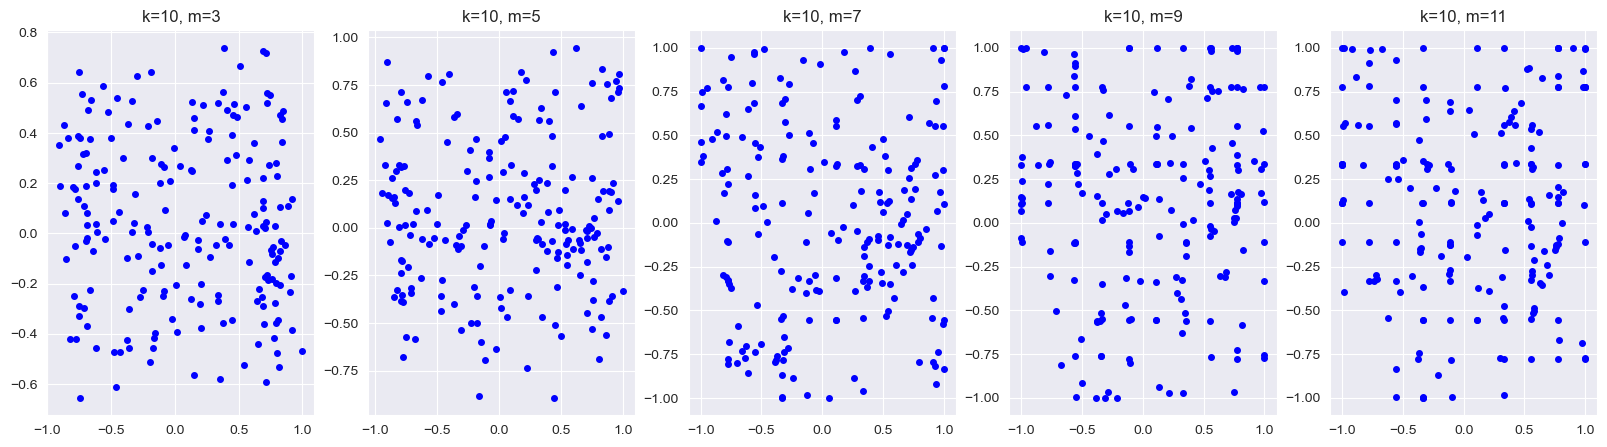

In [50]:
#TODO block 6
# Create plots for GTMs with fixed k=10 and let m = 3, 5, 7, 9, 11
m_values = [3, 5, 7, 9, 11]
fig, axes = plt.subplots(1, len(m_values), figsize=(20, 5))

for i, m in enumerate(m_values):
    gtm = ugtm.eGTM(k=10, m=m, s=1, regul=0.5, random_state=1729)
    gtm.fit(Xtrain)
    points = gtm.transform(Xtest)
    scatterPlot = axes[i].plot(points[0:200, 0], points[0:200, 1], 'b.', markersize=8)
    axes[i].set_title(f'k=10, m={m}')
    
plt.show()



Next, write some code to create plots for GTMs with k = 2, 3, 6, 8, 12 and fixed m = 5. Write down what you notice about these plots.

接下来，编写一些代码，为固定的m=5的GTM创建图形，让k=2, 3, 6, 8, 12。写下你对这些图形的观察。

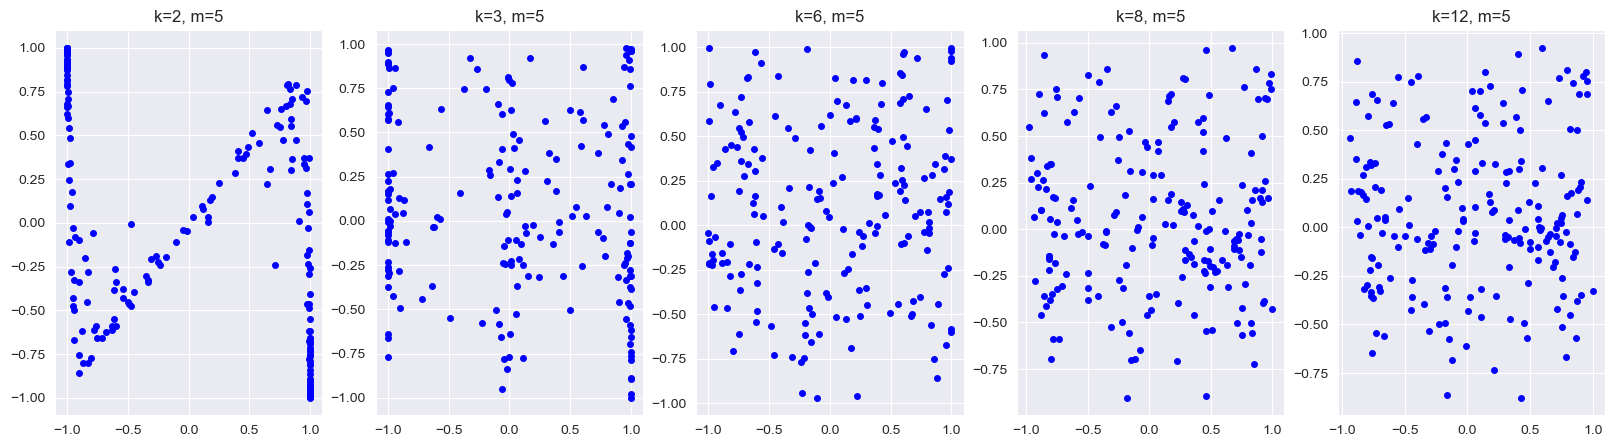

In [51]:
#TODO block 7
# Create plots for GTMs with k = 2, 3, 6, 8, 12 and fixed m = 5
k_values = [2, 3, 6, 8, 12]
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5))

for i, k in enumerate(k_values):
    gtm = ugtm.eGTM(k=k, m=5, s=1, regul=0.5, random_state=1729)
    gtm.fit(Xtrain)
    points = gtm.transform(Xtest)
    scatterPlot = axes[i].plot(points[0:200, 0], points[0:200, 1], 'b.', markersize=8)
    axes[i].set_title(f'k={k}, m=5')
    
plt.show()



## GTM on digit data
In the next block, write some code to fit a GTM to the digit data with k=10 and m=6, and project the data to a variable `embedding`. Write down what you notice about the visualisation plot.

在下一个代码块中，编写一些代码，使用k=10和m=6拟合一个GTM到数字数据，并将数据投影到一个变量`embedding`。写下你对可视化图形的观察。

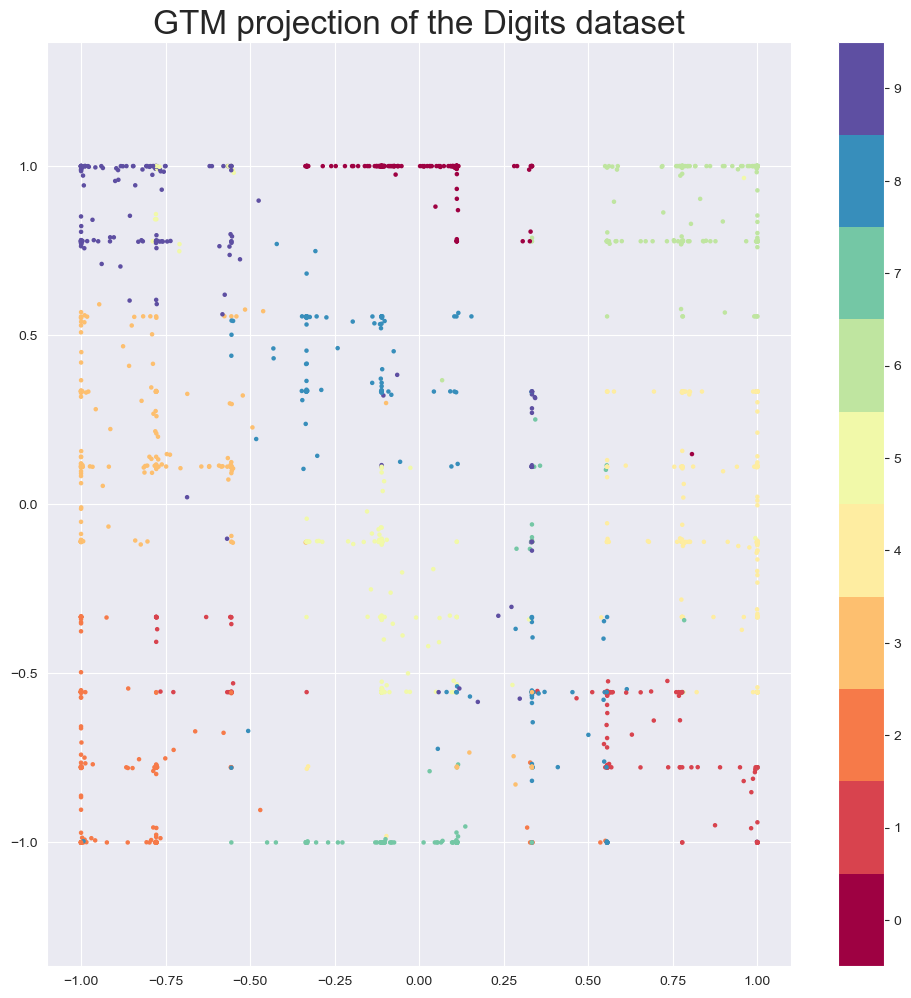

In [52]:
from sklearn.datasets import load_digits

digits = load_digits()

#TODO block 8
gtm = ugtm.eGTM(k=10, m=6, s=1, regul=0.5, random_state=1729)
gtm.fit(digits.data)
embedding = gtm.transform(digits.data)

#Plotting code for a good figure.
plt.figure(figsize=(12, 12))

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('GTM projection of the Digits dataset', fontsize=24);